<a href="https://colab.research.google.com/github/Amanr1996/ML_YesBankPrice_Pred_cap_project/blob/main/YesBankPricePredML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Yesbank stock price prediction.**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


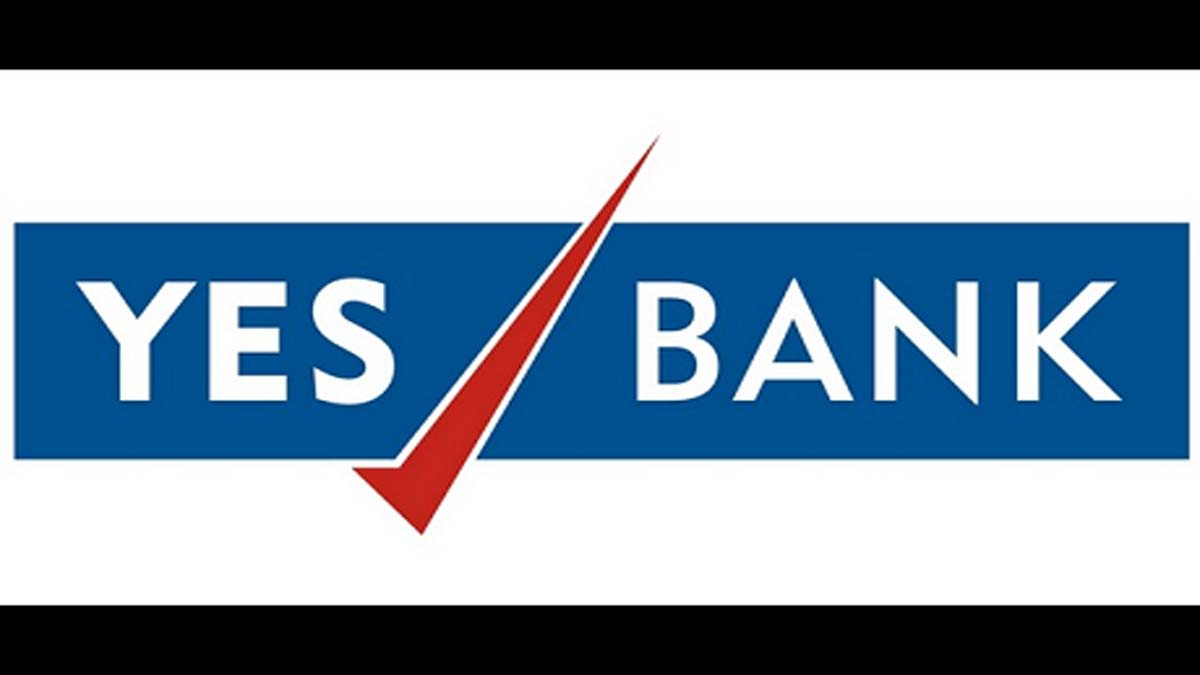

# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

# **GitHub Link -**  https://github.com/Amanr1996/ML_YesBankPrice_Pred_cap_project/blob/main/YesBankPricePredML_.ipynb

# **Colab Link -**  https://colab.research.google.com/github/Amanr1996/ML_YesBankPrice_Pred_cap_project/blob/main/YesBankPricePredML_.ipynb

# **Problem Statement**


PROBLEM STATEMENT :-
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

#**Our main objective is to predict the closing price of the stock.**

# **General Guidelines** : -  

# ***Let's Begin !***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.rcParams['figure.figsize'] = 14, 8


### Dataset Loading

In [ ]:
# Load Dataset
path = "/content/data_YesBank_StockPrices.csv"
df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

In [ ]:
df.head()

In [ ]:
df.sample(5)

In [ ]:
df.tail()

### Dataset Rows & Columns count

In [ ]:
## name of columns.
df.columns

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

There are no missing values in the data set.


### What do we Know about dataset?

1. There are 5 columns and 185 rows in the data set.
2. Open, High, Low, Close, These columns are in Float64 data type.
3. Data set having no missing value.
4. Column "Date" is in objet formate.

**Change the formate of the date column**

In [ ]:
## changing Dtype of the "Date" column
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df["Date"]

## ***2. Understanding  Variables***

In [ ]:
# Dataset Columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

**features present in the Data set**:-

* Date :- The date (Month and Year provided)

* Open :- The price of the stock at the beginning of a particular time period.
* High :-The Peak(Maximum) price at which a stock traded during the period.
* Low :-The Lowest price at which a stock traded during the period.
* Close :- The trading price at the end (in this case end of the month).

## 3. ***Data Wrangling***

### Data Wrangling Code

First of all we will change the data type of Dtae column.

In [ ]:
## changing Dtype of the "Date" column
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df["Year"].unique()

In [ ]:
# Write your code to make your dataset analysis ready.
df.corr()

In [ ]:
## Lets find out the correlation between every variables.
col_list = list(df.columns)
for i in  col_list:
  if i != 'Date': # Here We Are not considering Date column.
    print(f"Correlation with '{i}'")
    print(df.corr()[i])
  

**We dont need date and year Columns so we decided to Drop these columns**

In [ ]:
df.head()

### What all manipulations have you done and insights you found?

from the above dat we can make following assumptions
1. Year column having least corelation with every variables.
2. Month column is highly negative correlation with the variable.
3. Every Variables are highly correlated to each other.
4. As we have limited data there is no chance of deleting the columns that might effect on the overall result.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Create a scatter plot of Opening_price vs. Closing_price
sns.scatterplot(x='Open', y='Close', data=df)
plt.show()

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We can clearly  see two outliers 

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
df.hist(bins = 20, figsize=(20,15))

Insights we found -
1. in the most of the features the price range is in between 0-50

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
from pandas.plotting import scatter_matrix ## importing the library  for ploting multiple scatter plots in one go.
attributes = list(df.columns) ## giving the list of the columns.
scatter_matrix(df[attributes], figsize = (15,15))

#### Chart - 4

In [ ]:
# Checking all features for presence of outliers.
for col in df.columns:
  if col not in ["Date", "Year", "Month"]:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize=13)
    plt.show()
      

Box plot is used for outlier Detection 

As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

# Plotting the distributions of all features.
for col in df.columns:
  if col not in ["Month", "Year", "Date"]:
    print("Probablity distribution for", col)
    plt.figure(figsize=(10,6))
    sns.distplot(df[col], color='y')
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')

    # Plotting the mean and the median.
    plt.axvline(df[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
    plt.axvline(df[col].median(),color='red',linestyle='dashed',linewidth=1.5)
    plt.show()

* To se the probability distribution of the features 

* To See the skewness of the data.




* All features in the data set are positively skewed.

#### Chart - 6

#### Chart - 7 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Chart - 6 visualization code
# Create a heatmap of the correlation between Closing_price, Opening_price, Highest_price, and Lowest_price
corr = df[['Close', 'Open', 'High', 'Low']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

All Variables are highly correlated to each other.

#### Chart - 8 - Pair Plot 

In [ ]:
# Pair Plot visualization code
# Chart - 12 visualization code
sns.pairplot(df)

## ***5. Hypothesis Testing***

Answer Here.

### Hypothetical Statement - 1

1. Test whether there is a significant linear relationship between the opening price and the closing price of Yes Bank stock.

* Null hypothesis: There is no significant linear relationship between the opening price and the closing price of Yes Bank stock.

* Alternative hypothesis: There is a significant linear relationship between the opening price and the closing price of Yes Bank stock.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Import necessary libraries.
from scipy.stats import pearsonr


# Calculate the Pearson correlation coefficient and p-value
corr, p = pearsonr(df['Open'], df['Close'])

# Print the results
print('Pearson correlation coefficient:', corr)
print('p-value:', p)

# Check the significance level
alpha = 0.05
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

##### Which statistical test have you done to obtain P-Value?

1. The statistical test used to obtain the p-value for hypothesis tests is the parametric test.
2. Hypothesis test used the Pearson correlation test.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Based on the Pearson correlation test, we can conclude that there is a significant linear relationship between the opening price and the closing price of Yes Bank stock (p-value < 0.05). Therefore, we reject the null hypothesis that there is no correlation between the opening price and the closing price.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values in the data set.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

* since We have very limited set of data we cannot remove Oultliers

* instead we will use log Transformation in next steps.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
###we have to drop the date date month year columns.
df.drop(["Date","Year", "Month"], axis = 1)

In [ ]:
df.head()

#### 2. Feature Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

x = df.iloc[:, 1:-3] ## we are selecting independent features.
y = df.iloc[:,-3]

In [ ]:
print(x.head())
print(y.head())

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* While analysing the dat we found that the data is positively skewed so we have to transform the data according to that.

* For that we will use the log transformation which most suitable for the positively skewed data.

In [ ]:
# Transforming data.

x_trfm = np.log10(x). values  # applying log transform on our independent variables.

y_trfm =  np.log10(y).values  # applying log transform on our dependent variables.


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


from sklearn.model_selection import train_test_split    ## importing the library to train test split.

x_train, x_test, y_train, y_test = train_test_split(x_trfm, y_trfm, test_size = 0.2, random_state= 45)   ##  spliting the data


##### What data splitting ratio have you used and why? 

* Using 80% data for model traing.
* Using 20% data for model test
* We Have given shuffling parameter a int value whch is 45.

### 6. Data Scaling

*Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.*

In [ ]:
# Scaling your data
## lets import the library for preposing.
from sklearn.preprocessing import StandardScaler

sts = StandardScaler()   ## storing it in the variable sts

x_train_sts = sts.fit_transform(x_train)  ## storing transformed data in new variable.


x_test_sts = sts.transform(x_test)    ## storing transformed data in new variable.


##### Which method have you used to scale you data and why?
Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.

#**Model Implementation**

**Linear Regression Model**

In [ ]:
# importing LinearRegression model and the metrics that we will use for evaluating different models performance.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score 


lr = LinearRegression() ## storing it in variable.

lr.fit(x_train_sts, y_train)

In [ ]:
y_pred_train_lr = lr.predict(x_train_sts)

In [ ]:
## lets predict the test data

y_pred_test_lr = lr.predict(x_test_sts)

In [ ]:
## ## cross Validating the method on testing data.
LR_RMSE = np.mean(cross_val_score (lr,x_test_sts, 10**y_pred_test_lr, scoring = "neg_root_mean_squared_error", cv = 10))
print("LR_RMSE:", LR_RMSE)

LR_MSE = np.mean(cross_val_score (lr,x_test_sts, 10**y_pred_test_lr, scoring = "neg_mean_squared_error", cv = 10))
print("LR_MSE:", LR_MSE)

LR_R2 = np.mean(cross_val_score (lr,x_test_sts, 10**y_pred_test_lr, scoring = "r2", cv = 3))
print("LR_R2:",LR_R2)

In [ ]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_lr)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [ ]:
## creating the dictionary 
linear_regessor_list = {'Mean squared Error' : LR_MSE,'Root Mean squared Error' : LR_RMSE,'R2 score' : LR_R2 }

In [ ]:
metric_df_1 = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()

In [ ]:
# converting above dict into a dataframe
metric_df_1 = metric_df_1.rename(columns={'index':'Metric',0:'Linear Regression'})

metric_df_1


#**Ridge Regression with cross validated regularization.**

In [ ]:
from sklearn.linear_model import Ridge   ## importing the ridge model.
from sklearn.model_selection import GridSearchCV 
ridge = Ridge()

ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)




In [ ]:
# cross validation. 
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train_sts,y_train)

In [ ]:

# finding the best parameter value (for alpha)
ridge_regressor.best_params_


In [ ]:
rig = Ridge(alpha = 0.001)   ## initializing model and giving the alpha = 0.01.

rig.fit(x_train_sts, y_train) ## fitting the model on trainig data set.

In [ ]:
y_pred_train_rig = rig.predict(x_train_sts)

In [ ]:
## lets predict the test data

y_pred_test_rig = rig.predict(x_test_sts)

In [ ]:
## ## cross Validating the method on testing data.
Ridge_RMSE = np.mean(cross_val_score (rig,x_test_sts, y_pred_test_rig, scoring = "neg_root_mean_squared_error", cv = 10))
print("Ridge_RMSE:", Ridge_RMSE)

Ridge_MSE =  np.mean(cross_val_score (rig,x_test_sts, y_pred_test_rig, scoring = "neg_mean_squared_error", cv = 10))
print("Ridge_MSE:", Ridge_MSE)

Ridge_R2 = np.mean(cross_val_score (rig,x_test_sts, y_pred_test_rig, scoring = "r2", cv = 3))
print("Ridge_R2",Ridge_R2)

In [ ]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(y_pred_test_rig)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [ ]:
## creating the dictionary 
Ridge_regessor_list = {'Mean squared Error' : Ridge_MSE,'Root Mean squared Error' : Ridge_RMSE,'R2 score' : Ridge_R2 }

In [ ]:
metric_df_2 = pd.DataFrame.from_dict(Ridge_regessor_list, orient='index').reset_index()

In [ ]:
# converting above dict into a dataframe
metric_df_2 = metric_df_2.rename(columns={'index':'Metric',0:'Ridge Regression'})


metric_df_2

#**Lasso Regression with cross validated regularization**

In [ ]:
# Importing Lasso model.
from sklearn.linear_model import Lasso

In [ ]:
ls = Lasso(alpha = 0.001,  max_iter = 3000)  ## Initializing the model with same base value

In [ ]:
## fiting the odel on the data set

ls.fit(x_train_sts, y_train)

In [ ]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters. 
                                                                                   
                                                                                  
lasso_regressor = GridSearchCV(ls, lasso_param_grid, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train_sts, y_train)

In [ ]:
lasso_regressor.best_params_     ### from this we will get base Parameter.

In [ ]:
lasso_regressor.best_score_  # finding best score.

In [ ]:
ls = Lasso(alpha = 1e-08,  max_iter = 3000) ## tunnig Parameters 

In [ ]:
ls.fit(x_train_sts, y_train)

In [ ]:
y_pred_train_ls = ls.predict(x_train_sts) ## predicting the test data.

In [ ]:
## lets predict the test data

y_pred_test_ls = ls.predict(x_test_sts)

In [ ]:
## ## cross Validating the method on testing data.
Lasso_RMSE = np.mean(cross_val_score (ls,x_test_sts,10**y_pred_test_rig, scoring = "neg_root_mean_squared_error", cv = 10))
print("Lasso_RMSE:", Lasso_RMSE)

Lasso_MSE = np.mean(cross_val_score (ls,x_test_sts, 10**y_pred_test_rig, scoring = "neg_mean_squared_error", cv = 10))
print("Lasso_MSE:", Lasso_MSE)

Lasso_R2 = np.mean(cross_val_score (ls,x_test_sts, 10**y_pred_test_rig, scoring = "r2", cv = 3))
print("Lasso_R2",Lasso_R2)

In [ ]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_ls)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [ ]:
## creating the dictionary 
Lasso_regessor_list = {'Mean squared Error' : Lasso_MSE,'Root Mean squared Error' : Lasso_RMSE,'R2 score' : Lasso_R2 }

In [ ]:
metric_df_3 = pd.DataFrame.from_dict(Lasso_regessor_list, orient='index').reset_index()

In [ ]:
# converting above dict into a dataframe
metric_df_3 = metric_df_3.rename(columns={'index':'Metric',0:'Lasso Regression'})

metric_df_3

#**Elastic-Net Regression with cross validation**

In [ ]:
# importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1, l1_ratio=0.5,max_iter=1000)

In [ ]:
# initializing parameter grid.[0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100]
elastic_net_param_grid = {'alpha': [0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [ ]:
# cross-validation.
elasticnet_regressor = GridSearchCV(en, elastic_net_param_grid, scoring = 'r2', cv=5)
elasticnet_regressor.fit(x_train_sts, y_train)

In [ ]:
## findin the best Parameter
elasticnet_regressor.best_params_

In [ ]:
## Initiating the model with the best Parameters we got 
en = ElasticNet(alpha = 0.001, l1_ratio = 0.1,max_iter=1000)

In [ ]:
en.fit(x_train_sts, y_train)

In [ ]:
## lets predict the test data

y_pred_test_en = en.predict(x_test_sts)

In [ ]:
## ## cross Validating the method on testing data.
Elastic_net_RMSE = np.mean(cross_val_score (en,x_test_sts, y_pred_test_en, scoring = "neg_root_mean_squared_error", cv = 10))
print("Elastic_net_RMSE:", Elastic_net_RMSE)

Elastic_net_MSE= np.mean(cross_val_score (en,x_test_sts, y_pred_test_en, scoring = "neg_mean_squared_error", cv = 10))
print("Elastic_net_MSE:",Elastic_net_MSE )

Elastic_net_R2 = np.mean(cross_val_score (en,x_test_sts, y_pred_test_en, scoring = "r2", cv = 3))
print("Elastic_net_R2",np.mean(cross_val_score (en,x_test_sts, y_pred_test_en, scoring = "r2", cv = 3)))





In [ ]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_en)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [ ]:
## creating the dictionary 
en_regessor_list = {'Mean squared Error' : Elastic_net_MSE,'Root Mean squared Error' : Elastic_net_RMSE,'R2 score' : Elastic_net_R2 }

In [ ]:
##resetting index.
metric_df_4 = pd.DataFrame.from_dict(en_regessor_list, orient='index').reset_index()

In [ ]:
# converting above dict into a dataframe
metric_df_4 = metric_df_4.rename(columns={'index':'Metric',0:'Elastic net Regression'})
metric_df_4


Note- Multicollinearity occurs when two or more predictors in a linear regression model are highly correlated with each other, making it difficult for the algorithm to determine their individual effects on the outcome variable. This can lead to unstable or unreliable coefficient estimates, and can cause the algorithm to converge to a suboptimal solution or not converge at all.

#**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor ## Importing the library 

In [ ]:
dtr = DecisionTreeRegressor()  ##initializing the model

In [ ]:
dtr.fit(x_train_sts, y_train) ## fitting the model

In [ ]:
y_pred_train_dtr = dtr.predict(x_train_sts)  ## Predicting the trainin data.

In [ ]:
y_pred_test_dtr = dtr.predict(x_test_sts)  ## Predicting the Data.

In [ ]:
## ## cross Validating the method on testing data.
dtr_RMSE = np.mean(cross_val_score (dtr,x_test_sts, 10**y_pred_test_dtr, scoring = "neg_root_mean_squared_error", cv = 3))
print("dtr_RMSE:",dtr_RMSE)

dtr_MSE = np.mean(cross_val_score (dtr,x_test_sts,10**y_pred_test_dtr, scoring = "neg_mean_squared_error", cv = 3))
print("dtr_MSE:",dtr_MSE)

dtr_R2 = np.mean(cross_val_score (dtr,x_test_sts, 10**y_pred_test_dtr, scoring = "r2", cv = 3))
print("dtr_R2",dtr_R2)

In [ ]:
score_Ridge = r2_score(y_pred_test_dtr, y_test)
score_Ridge

In [ ]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_dtr)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [ ]:
## creating the dictionary 
DTR_regessor_list = {'Mean squared Error' : dtr_MSE,'Root Mean squared Error' : dtr_RMSE,'R2 score' : dtr_R2 }

In [ ]:
metric_df_5 = pd.DataFrame.from_dict(DTR_regessor_list, orient='index').reset_index()

In [ ]:
# converting above dict into a dataframe
metric_df_5 = metric_df_5.rename(columns={'index':'Metric',0:'DecisionTreeRegressor'})

metric_df_5

#**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor ## Importing the library 

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)  ##initializing the model

In [ ]:
rf.fit(x_train_sts, y_train) ## fitting the model

In [ ]:
y_pred_train_rf = rf.predict(x_train_sts)  ## Predicting the trainin data.

In [ ]:
y_pred_test_rf = rf.predict(x_test_sts)  ## Predicting the Data.

In [ ]:
## ## cross Validating the method on testing data.
rf_RMSE = np.mean(cross_val_score (rf,x_test_sts, 10**y_pred_test_rf, scoring = "neg_root_mean_squared_error", cv = 3))
print("rf_RMSE:", rf_RMSE)

rf_MSE = np.mean(cross_val_score (rf,x_test_sts, 10**y_pred_test_rf, scoring = "neg_mean_squared_error", cv = 3))
print("rf_MSE:",rf_MSE)

rf_R2 = np.mean(cross_val_score (rf,x_test_sts, 10**y_pred_test_rf, scoring = "r2", cv = 3))
print("rf_R2",rf_R2)

In [ ]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_rf)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [ ]:
## creating the dictionary 
rf_regessor_list = {'Mean squared Error' : rf_MSE,'Root Mean squared Error' : rf_RMSE,'R2 score' : rf_R2 }

In [ ]:
# converting above dict into a dataframe
metric_df_6 = pd.DataFrame.from_dict(rf_regessor_list, orient='index').reset_index()

In [ ]:
# converting above dict into a dataframe
metric_df_6 = metric_df_6.rename(columns={'index':'Metric',0:'Random_forest_regressor'})

metric_df_6

In [ ]:
metrix_list = [metric_df_1, metric_df_2, metric_df_3, metric_df_4, metric_df_5, metric_df_6]

In [ ]:
import pandas as pd
from functools import reduce

Metrics_ = reduce(lambda left, right: pd.merge(left, right, on='Metric'), metrix_list)

In [ ]:
Metrics_.T

In [ ]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(16,8))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred_test_lr)
plt.plot(10**y_pred_test_rig)
plt.plot(10**y_pred_test_ls)
plt.plot(10**y_pred_test_en)
plt.plot(10**y_pred_test_dtr)
plt.plot(10**y_pred_test_rf)
plt.legend(['linear','ridge','lasso','elastic_net', "decision_tree",'Random_forest' ])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)

# **Conclusion**

* Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

* After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.
* There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.
* We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.
* There is a high correlation between the dependent and independent variables. *  This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.
* We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.
* We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Elastic Net regressor is the best performing model with Adjusted R2 score value of 0.9932 and scores well on all evaluation metrics.
*All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 99%.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***